In [2]:
import torch
from torch import nn
from tqdm.auto import tqdm
from torchvision import transforms
from torchvision.datasets import MNIST # Training dataset
from torchvision.utils import make_grid
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
torch.manual_seed(0) # Set for testing purposes, please do not change!


In [3]:
def show_tensor_images(image_tensor, num_images=25, size=(1, 28, 28)):
    """
    Function to visualize generated tensors
    """
    image_unflat = image_tensor.detach().cpu().view(-1, *size)
    image_grid = make_grid(image_unflat[:num_images], nrow=5)
    plt.imshow(image_grid.permute(1, 2, 0).squeeze())
    plt.show()

In [51]:
class Generator(nn.Module):
    def __init__(self, z_dim=10, im_dim=784, hidden_dim=128):
        super(Generator, self).__init__()
        self.relu = nn.ReLU(inplace = True)
        self.sig = nn.Sigmoid()
        self.linear1 = nn.Linear(z_dim, hidden_dim)
        self.b_norm1 = nn.BatchNorm1d(hidden_dim)
        self.linear2 = nn.Linear(hidden_dim, hidden_dim*2)
        self.b_norm2 = nn.BatchNorm1d(hidden_dim*2)
        self.linear3 = nn.Linear(hidden_dim*2, hidden_dim*4)
        self.b_norm3 = nn.BatchNorm1d(hidden_dim*4)
        self.linear4 = nn.Linear(hidden_dim*4, hidden_dim*8)
        self.b_norm4 = nn.BatchNorm1d(hidden_dim*8)
        self.output = nn.Linear(hidden_dim * 8, im_dim)
    def forward(self, noise):
        #import pdb;pdb.set_trace()
        intermediate1 = self.relu(self.b_norm1(self.linear1(noise)))
        intermediate2 = self.relu(self.b_norm2(self.linear2(intermediate1)))
        intermediate3 = self.relu(self.b_norm3(self.linear3(intermediate2)))
        intermediate4 = self.relu(self.b_norm4(self.linear4(intermediate3)))
        out = self.sig(self.output(intermediate4))
        return out

In [52]:
def get_noise(n_samples, z_dim, device='cpu'):
    noise = torch.randn(n_samples,z_dim, device = device)
    return noise

In [53]:
class Discriminator(nn.Module):
    def __init__(self, im_dim=784, hidden_dim=128):
        super(Discriminator, self).__init__()
        self.l_relu = nn.LeakyReLU(negative_slope  = 0.2)
        self.linear1 = nn.Linear(im_dim,hidden_dim * 4)
        self.linear2 = nn.Linear(hidden_dim * 4,hidden_dim *2)
        self.linear3 = nn.Linear(hidden_dim * 2,hidden_dim)
        self.output = nn.Linear(hidden_dim,1)
    def forward(self, image):
        #import pdb;pdb.set_trace()
        intermediate1 = self.l_relu(self.linear1(image))
        intermediate2 = self.l_relu(self.linear2(intermediate1))
        intermediate3 = self.l_relu(self.linear3(intermediate2))
        out = self.output(intermediate3)
        return out

In [54]:
criterion = nn.BCEWithLogitsLoss()
n_epochs = 20
z_dim = 64
display_step = 500
batch_size = 128
lr = 0.00001

In [55]:
dataloader = DataLoader(
    MNIST('.', download=True, transform=transforms.ToTensor()),
    batch_size=batch_size,
    shuffle=True)

device = 'cuda'

In [56]:
gen = Generator(z_dim).to(device)
gen_opt = torch.optim.Adam(gen.parameters(), lr=lr)
disc = Discriminator().to(device) 
disc_opt = torch.optim.Adam(disc.parameters(), lr=lr)

In [57]:
def get_disc_loss(gen, disc, criterion, real, num_images, z_dim, device):
    noise = get_noise(num_images,z_dim, device)
    fake = gen(noise).detach()
    pred = disc(fake)
    pred_2 = disc(real)
    loss_1 = criterion(pred,torch.zeros_like(pred))
    loss_2 = criterion(pred_2,torch.ones_like(pred_2))
    disc_loss = (loss_1+loss_2)/2
    return disc_loss

In [58]:
def get_gen_loss(gen, disc, criterion, num_images, z_dim, device):
    noise = get_noise(num_images,z_dim, device)
    fake = gen(noise)
    pred = disc(fake)
    gen_loss = criterion(pred,torch.ones_like(pred))
    return gen_loss

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 1, step 500: Generator loss: 1.3516773020029058, discriminator loss: 0.4339889299273492


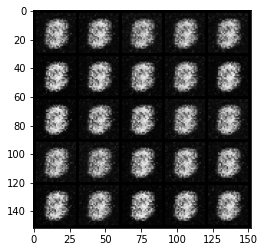

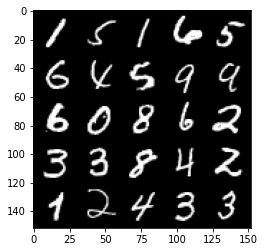

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 2, step 1000: Generator loss: 1.741097208976744, discriminator loss: 0.2872587050199511


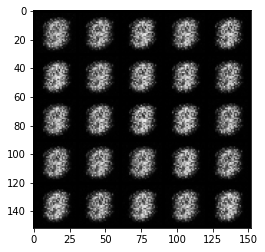

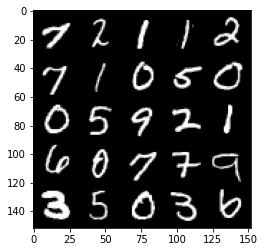

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 3, step 1500: Generator loss: 2.067217676639557, discriminator loss: 0.16088538175821288


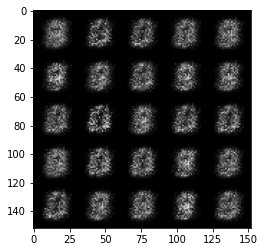

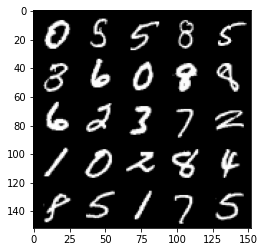

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 4, step 2000: Generator loss: 1.7199716382026669, discriminator loss: 0.21588613146543506


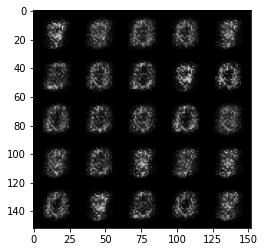

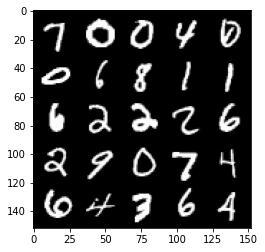

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 5, step 2500: Generator loss: 1.6616338765621181, discriminator loss: 0.21530538249015838


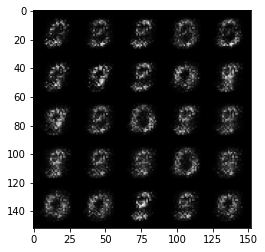

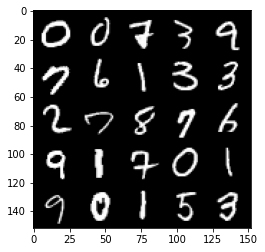

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 6, step 3000: Generator loss: 1.9205886020660405, discriminator loss: 0.1735003754496573


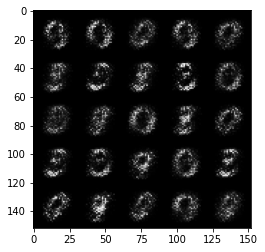

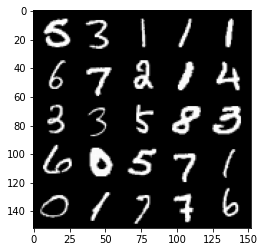

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 7, step 3500: Generator loss: 2.233387825250625, discriminator loss: 0.14205800884962072


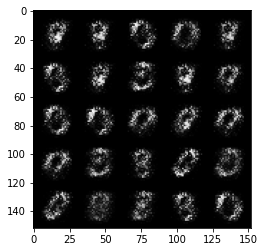

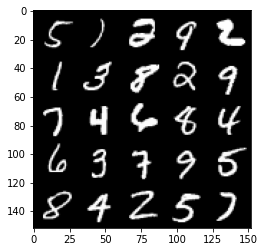

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 8, step 4000: Generator loss: 2.8172265682220465, discriminator loss: 0.10241155306994916


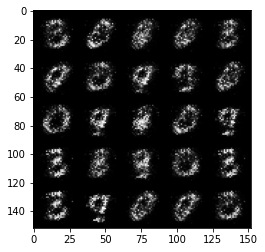

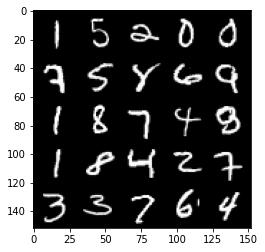

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 9, step 4500: Generator loss: 3.145199936866763, discriminator loss: 0.09101442553102967


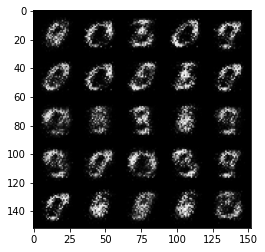

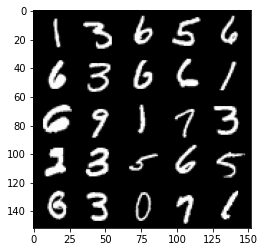

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 10, step 5000: Generator loss: 3.4507704586982677, discriminator loss: 0.0772818267196417


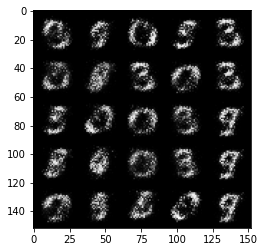

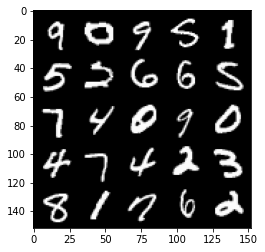

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 11, step 5500: Generator loss: 3.6667626090049743, discriminator loss: 0.07614956652373069


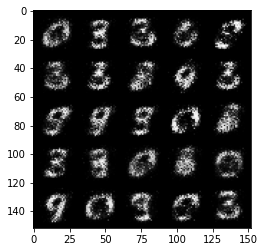

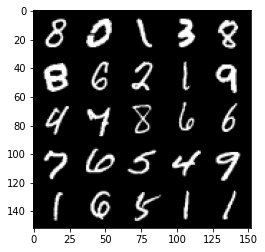

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 12, step 6000: Generator loss: 3.801930256366727, discriminator loss: 0.07446130494773387


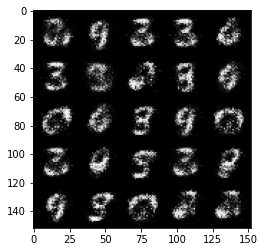

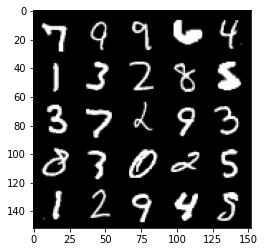

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 13, step 6500: Generator loss: 3.9441076421737677, discriminator loss: 0.07251079452782874


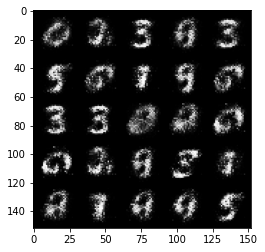

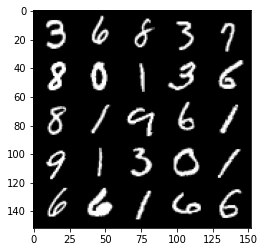

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 14, step 7000: Generator loss: 3.8415088996887228, discriminator loss: 0.07759555428475154


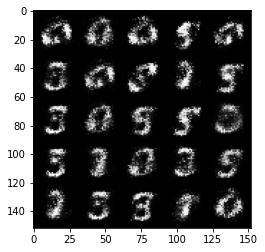

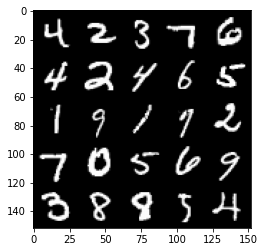

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 15, step 7500: Generator loss: 4.1681147561073315, discriminator loss: 0.051940010376274624


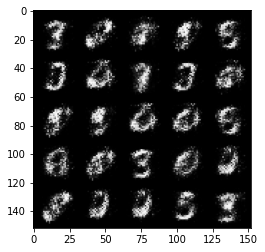

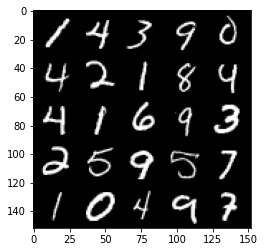

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 17, step 8000: Generator loss: 3.9729971351623523, discriminator loss: 0.0579020250067115


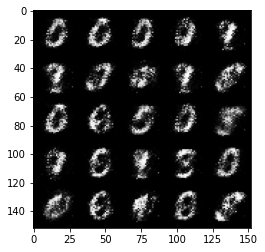

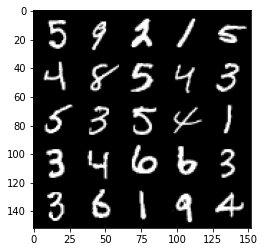

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 18, step 8500: Generator loss: 4.231441223144531, discriminator loss: 0.05485628976300357


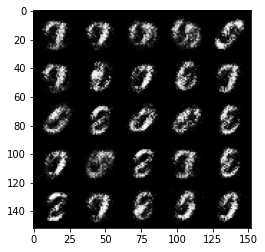

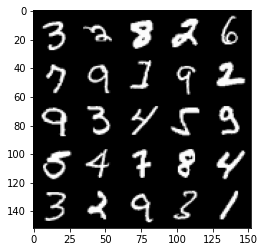

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 19, step 9000: Generator loss: 4.367120355129244, discriminator loss: 0.05444773257523778


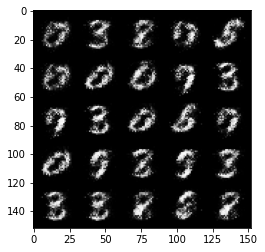

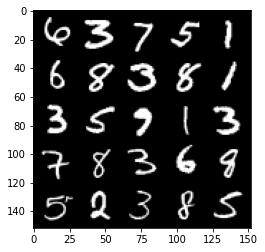

In [61]:
# UNQ_C8 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
# GRADED FUNCTION: 

cur_step = 0
mean_generator_loss = 0
mean_discriminator_loss = 0
gen_loss = False
error = False
for epoch in range(n_epochs):
      for real, _ in tqdm(dataloader):
        cur_batch_size = len(real)

        # Flatten the batch of real images from the dataset
        real = real.view(cur_batch_size, -1).to(device)

        ### Update discriminator ###
        # Zero out the gradients before backpropagation
        disc_opt.zero_grad()

        # Calculate discriminator loss
        disc_loss = get_disc_loss(gen, disc, criterion, real, cur_batch_size, z_dim, device)

        # Update gradients
        disc_loss.backward(retain_graph=True)

        # Update optimizer
        disc_opt.step()

        ### Update generator ###
        gen_opt.zero_grad()
        gen_loss = get_gen_loss(gen, disc, criterion, cur_batch_size, z_dim, device)
        gen_loss.backward(retain_graph=True)
        gen_loss.backward(retain_graph=True)
        gen_opt.step()

        # Keep track of the average discriminator loss
        mean_discriminator_loss += disc_loss.item() / display_step

        # Keep track of the average generator loss
        mean_generator_loss += gen_loss.item() / display_step

        if cur_step % display_step == 0 and cur_step > 0:
            print(f"Epoch {epoch}, step {cur_step}: Generator loss: {mean_generator_loss}, discriminator loss: {mean_discriminator_loss}")
            fake_noise = get_noise(cur_batch_size, z_dim, device=device)
            fake = gen(fake_noise)
            show_tensor_images(fake)
            show_tensor_images(real)
            mean_generator_loss = 0
            mean_discriminator_loss = 0
        cur_step += 1
